In [1]:
%%html
<!DOCTYPE html>
<html>
<head>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjs/11.11.0/math.min.js"></script>
</head>
<body>
  <h2>Matriks Transisi Markov dan Steady State</h2>
  <pre id="output"></pre>

  <script>
    const output = document.getElementById('output');

    // Matriks Transisi P
    const P = math.matrix([
      [0,     1/3,   0,     2/3],
      [0,     0,     0,     1],
      [3/8,   0,   3/8,   2/8],
      [4/22,  0,   1/22, 17/22]
    ]);

    function logMatrix(matrix, label) {
      output.innerHTML += `\n${label}:\n`;
      matrix._data.forEach(row => {
        output.innerHTML += row.map(x => x.toFixed(4)).join('\t') + '\n';
      });
    }

    // Fungsi untuk menghitung steady state
    function getSteadyState(P) {
      const size = P._size[0];
      let A = math.subtract(math.transpose(P), math.identity(size));
      let ones = Array(size).fill(1);
      A = A._data;
      A.push(ones); // Tambahkan persamaan sum(pi) = 1

      let b = Array(size).fill(0);
      b.push(1);

      // Gunakan least square
      const pinv = math.pinv(A);
      const pi = math.multiply(pinv, b);
      return pi;
    }

    // Hitung P^2, P^4, P^8
    const P2 = math.multiply(P, P);
    const P4 = math.multiply(P2, P2);
    const P8 = math.multiply(P4, P4);

    logMatrix(P, 'Matriks Transisi P (1-step)');
    logMatrix(P2, 'Matriks Transisi P^2 (2-step)');
    logMatrix(P4, 'Matriks Transisi P^4 (4-step)');
    logMatrix(P8, 'Matriks Transisi P^8 (8-step)');

    const steady = getSteadyState(P);
    output.innerHTML += `\nSteady State Probabilities:\n[${steady.map(p => p.toFixed(6)).join(', ')}]`;
  </script>
</body>
</html>


In [8]:
import numpy as np
from numpy.linalg import matrix_power, solve

# Matriks Transisi Satu Langkah
P = np.array([
    [0,     1/3,   0,     2/3],
    [0,     0,     0,     1],
    [3/8,   0,   3/8,   2/8],
    [4/22,  0,   1/22, 17/22]
])

def print_matrix(M, label):
    print(f'\n{label}:')
    for row in M:
        print('\t'.join(f'{val:.4f}' for val in row))

# Hitung transisi n-step
P2 = matrix_power(P, 2)
P4 = matrix_power(P, 4)
P8 = matrix_power(P, 8)
P10 = matrix_power(P, 10)

# Tampilkan hasil
print_matrix(P, 'Matriks Transisi P (1-step)')
print_matrix(P2, 'Matriks Transisi P^2 (2-step)')
print_matrix(P4, 'Matriks Transisi P^4 (4-step)')
print_matrix(P8, 'Matriks Transisi P^8 (8-step)')
print_matrix(P10, 'Matriks Transisi P^8 (10-step)')

# Hitung steady state: cari vektor π sehingga πP = π dan ∑π = 1
# Syaratnya: (P^T - I)^T * π = 0, lalu tambah constraint ∑π = 1

n = P.shape[0]
A = np.transpose(P) - np.eye(n)
A = np.vstack([A, np.ones(n)])  # Tambahkan constraint sum(pi) = 1
b = np.zeros(n + 1)
b[-1] = 1

steady_state = solve(np.dot(A.T, A), np.dot(A.T, b))

print("\nSteady State Probabilities:")
for i, p in enumerate(steady_state):
    print(f'π{i} = {p:.6f}')



Matriks Transisi P (1-step):
0.0000	0.3333	0.0000	0.6667
0.0000	0.0000	0.0000	1.0000
0.3750	0.0000	0.3750	0.2500
0.1818	0.0000	0.0455	0.7727

Matriks Transisi P^2 (2-step):
0.1212	0.0000	0.0303	0.8485
0.1818	0.0000	0.0455	0.7727
0.1861	0.1250	0.1520	0.5369
0.1575	0.0606	0.0522	0.7297

Matriks Transisi P^4 (4-step):
0.1540	0.0552	0.0525	0.7382
0.1522	0.0525	0.0527	0.7425
0.1582	0.0515	0.0624	0.7279
0.1548	0.0507	0.0535	0.7410

Matriks Transisi P^8 (8-step):
0.1547	0.0516	0.0538	0.7399
0.1547	0.0516	0.0538	0.7399
0.1547	0.0516	0.0539	0.7398
0.1547	0.0516	0.0538	0.7399

Matriks Transisi P^8 (10-step):
0.1547	0.0516	0.0538	0.7399
0.1547	0.0516	0.0538	0.7399
0.1547	0.0516	0.0538	0.7399
0.1547	0.0516	0.0538	0.7399

Steady State Probabilities:
π0 = 0.154709
π1 = 0.051570
π2 = 0.053812
π3 = 0.739910


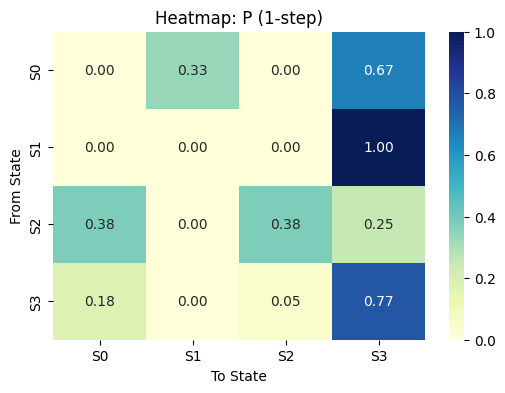

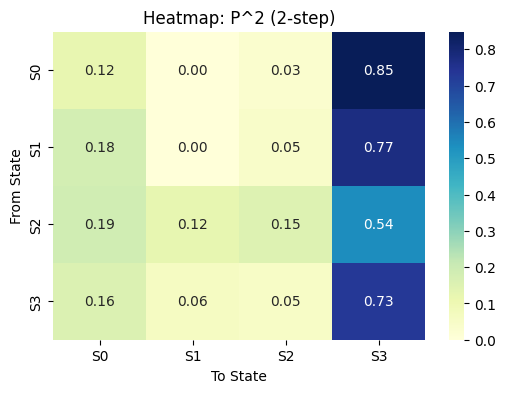

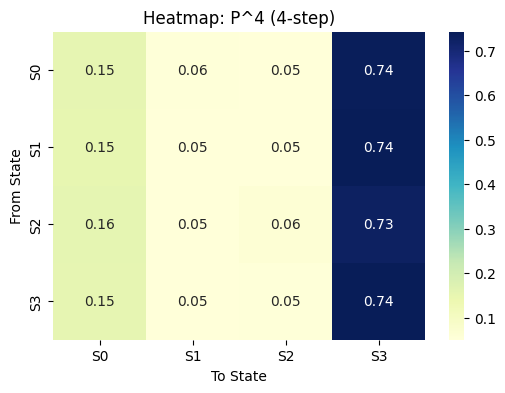

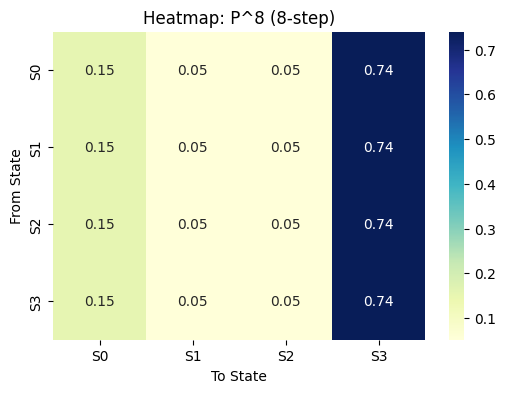

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi Heatmap
def plot_heatmap(matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True,
                xticklabels=[f'S{j}' for j in range(matrix.shape[1])],
                yticklabels=[f'S{i}' for i in range(matrix.shape[0])])
    plt.title(title)
    plt.xlabel("To State")
    plt.ylabel("From State")
    plt.show()

# Tampilkan heatmaps
plot_heatmap(P, "Heatmap: P (1-step)")
plot_heatmap(P2, "Heatmap: P^2 (2-step)")
plot_heatmap(P4, "Heatmap: P^4 (4-step)")
plot_heatmap(P8, "Heatmap: P^8 (8-step)")


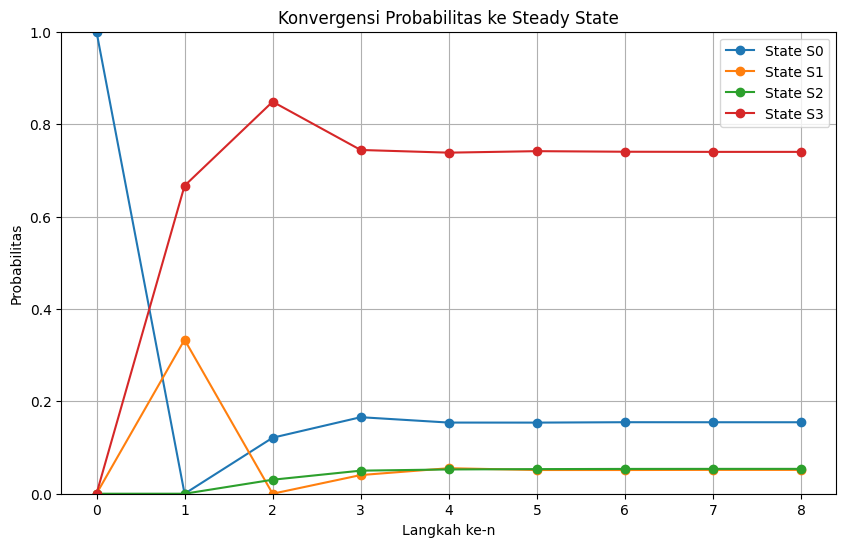

In [4]:
# Visualisasi distribusi state setelah n langkah (dari S0 awalnya 100%)
steps = 9
initial_state = np.array([1, 0, 0, 0])  # Mulai dari S0

distributions = [initial_state]
for i in range(1, steps):
    next_dist = distributions[-1] @ P
    distributions.append(next_dist)

distributions = np.array(distributions)

# Plot konvergensi
plt.figure(figsize=(10, 6))
for i in range(P.shape[0]):
    plt.plot(range(steps), distributions[:, i], marker='o', label=f'State S{i}')

plt.title('Konvergensi Probabilitas ke Steady State')
plt.xlabel('Langkah ke-n')
plt.ylabel('Probabilitas')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()


In [5]:
import random

# Simulasi Random Walk (Markov Chain Trajectory)
def simulate_markov_chain(P, start_state=0, steps=10):
    current_state = start_state
    trajectory = [current_state]
    for _ in range(steps):
        current_state = np.random.choice(range(P.shape[1]), p=P[current_state])
        trajectory.append(current_state)
    return trajectory

# Jalankan simulasi acak
random.seed(42)  # Agar hasil tetap
simulated_path = simulate_markov_chain(P, start_state=0, steps=10)

print("Simulasi Jalur Markov (Random Walk dari S0, 10 langkah):")
print(" -> ".join(f"S{state}" for state in simulated_path))


Simulasi Jalur Markov (Random Walk dari S0, 10 langkah):
S0 -> S3 -> S3 -> S3 -> S0 -> S3 -> S3 -> S0 -> S1 -> S3 -> S3


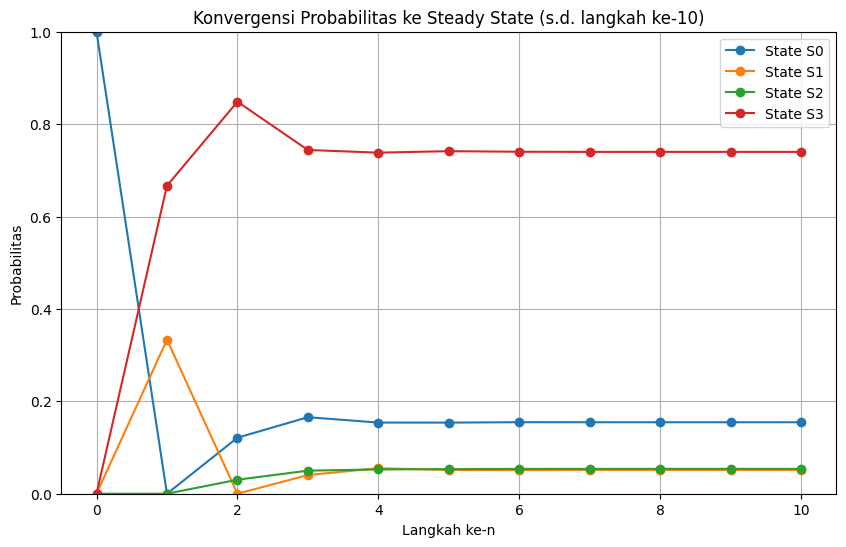

In [6]:
# Update grafik konvergensi hingga n = 10
steps = 11  # dari 0 sampai 10
initial_state = np.array([1, 0, 0, 0])  # Mulai dari S0

distributions = [initial_state]
for i in range(1, steps):
    next_dist = distributions[-1] @ P
    distributions.append(next_dist)

distributions = np.array(distributions)

# Plot konvergensi probabilitas
plt.figure(figsize=(10, 6))
for i in range(P.shape[0]):
    plt.plot(range(steps), distributions[:, i], marker='o', label=f'State S{i}')

plt.title('Konvergensi Probabilitas ke Steady State (s.d. langkah ke-10)')
plt.xlabel('Langkah ke-n')
plt.ylabel('Probabilitas')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()


In [7]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import networkx as nx

# Gunakan simulasi sebelumnya atau buat ulang
trajectory = simulate_markov_chain(P, start_state=0, steps=10)

# Buat graf Markov
G = nx.DiGraph()

states = ['S0', 'S1', 'S2', 'S3']
for i, from_state in enumerate(states):
    for j, to_state in enumerate(states):
        prob = P[i, j]
        if prob > 0:
            G.add_edge(from_state, to_state, weight=prob)

pos = nx.spring_layout(G, seed=42)  # Posisi tetap untuk visual konsisten

# Setup figure
fig, ax = plt.subplots(figsize=(6, 6))

def update(frame):
    ax.clear()
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue', ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, ax=ax)
    labels = {node: node for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=16, ax=ax)

    # Highlight node saat ini
    current_state = f'S{trajectory[frame]}'
    nx.draw_networkx_nodes(G, pos, nodelist=[current_state], node_color='orange', node_size=1200, ax=ax)

    # Judul
    ax.set_title(f'Langkah ke-{frame}: Di {current_state}', fontsize=14)
    ax.axis('off')

# Buat animasi
ani = animation.FuncAnimation(fig, update, frames=len(trajectory), interval=1000, repeat=False)

plt.close()  # Supaya tidak double output

from IPython.display import HTML
HTML(ani.to_jshtml())
